In [35]:
# Importar las librerias

# Ejercicio 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import contextily as ctx
from sklearn.cluster import DBSCAN



In [36]:
# Cargar el dataset
df_original = pd.read_csv('weatherAUS.csv')
df_ciudades=df_original.copy()

print("Columnas dataset", "(Cantidad:" , len(df_ciudades.columns), "):", df_ciudades.columns)

Columnas dataset (Cantidad: 23 ): Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [37]:
ciudades = df_ciudades['Location'].unique()
print(f"Número de ciudades únicas: {len(ciudades)}")
print(f"Ciudades: {ciudades}")

Número de ciudades únicas: 49
Ciudades: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [38]:
# 3. Diccionario de coordenadas para ciudades australianas (latitud, longitud)
coordenadas = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8680, 150.7650),
    'Cobar': (-31.4950, 145.8390),
    'CoffsHarbour': (-30.2963, 153.1179),
    'Moree': (-29.4650, 149.8344),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2809, 151.5773),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7511, 150.6942),
    'Richmond': (-33.5983, 150.7511),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9399, 151.1753),
    'WaggaWagga': (-35.1082, 147.3598),
    'Williamtown': (-32.8136, 151.8367),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4244, 149.0888),
    'MountGinini': (-35.5329, 148.7822),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7570, 144.2794),
    'Sale': (-38.1026, 147.0678),
    'MelbourneAirport': (-37.6690, 144.8410),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.2080, 142.1246),
    'Nhil': (-36.3331, 141.6503),
    'Portland': (-38.3432, 141.6036),
    'Watsonia': (-37.7071, 145.0830),
    'Dartmoor': (-37.9144, 141.2692),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2590, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8316, 140.7830),
    'Nuriootpa': (-34.4703, 138.9976),
    'Woomera': (-31.1950, 136.8050),
    'Albany': (-35.0274, 117.8839),
    'Witchcliffe': (-34.0278, 115.1044),
    'PearceRAAF': (-31.6677, 115.9984),
    'PerthAirport': (-31.9385, 115.9673),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9827, 121.6293),
    'Walpole': (-34.9535, 116.7075),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1455),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4647, 132.2660),
    'Uluru': (-25.3444, 131.0369)
}
coords_df = pd.DataFrame(
    [(ciudad, lat, lon) for ciudad, (lat, lon) in coordenadas.items()],
    columns=['Ciudad', 'Latitud', 'Longitud']
)

In [39]:
def metodo_codo(data, max_k=10):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), inertias, 'bo-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del codo para determinar k óptimo')
    plt.grid(True)
    plt.show()
    return inertias

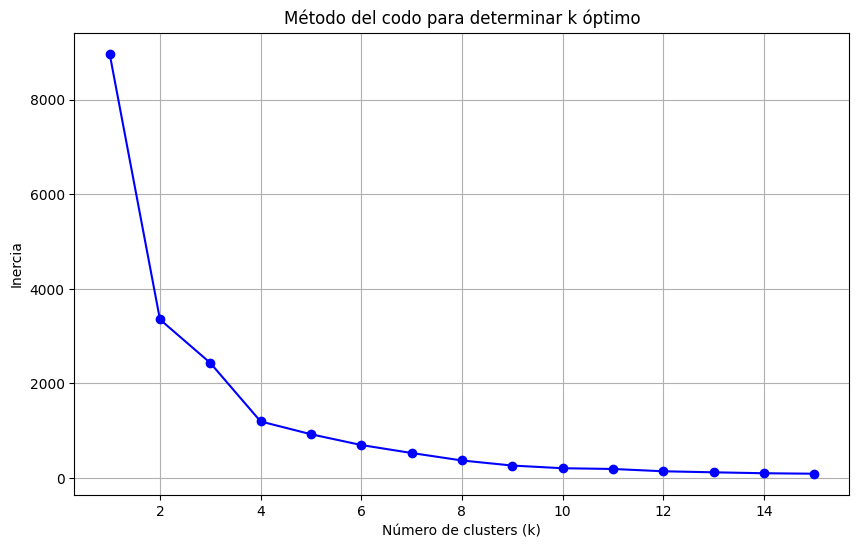

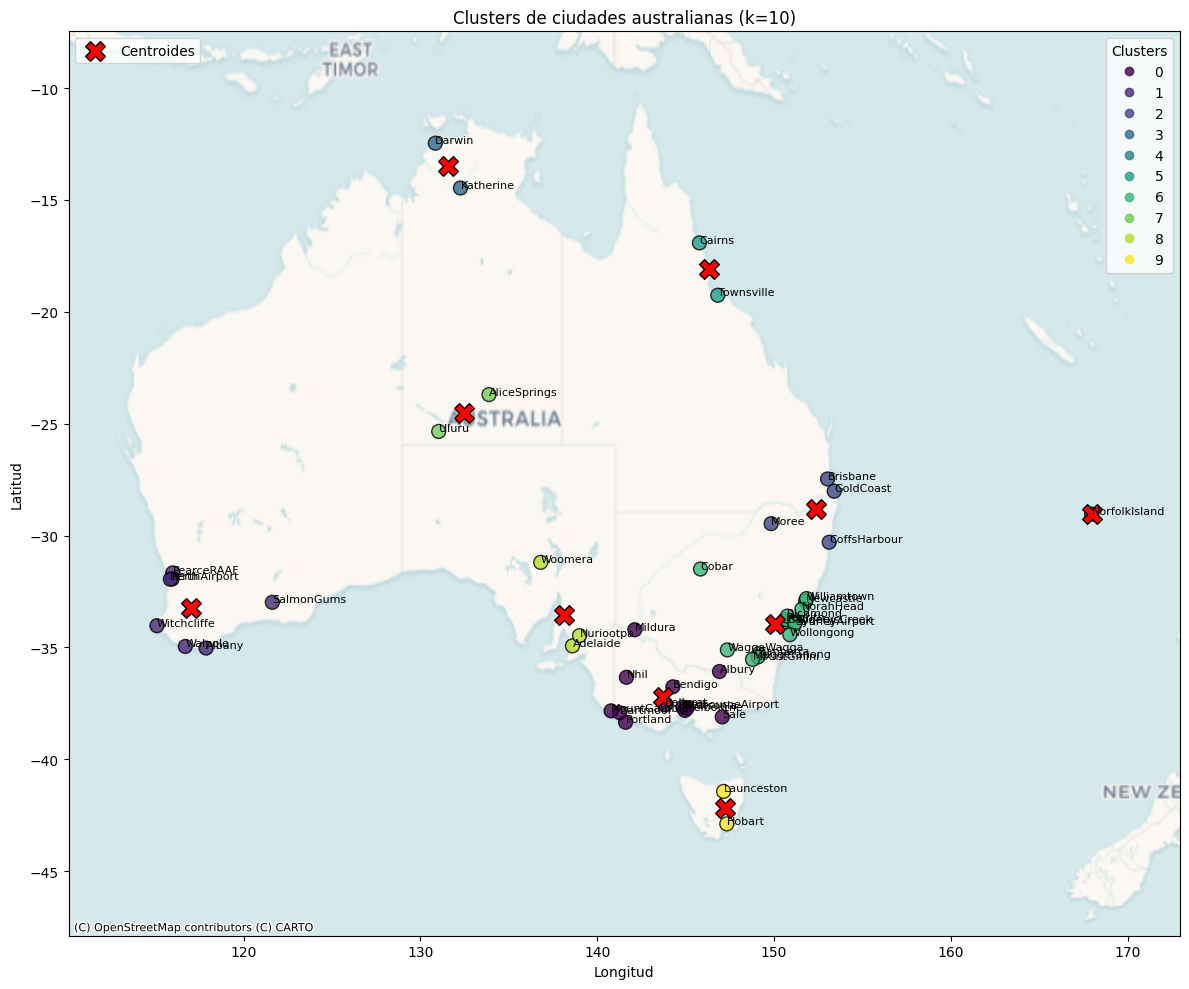

Centros de los clusters:
Cluster 0: Latitud -37.1930, Longitud 143.7024
Cluster 1: Latitud -33.2212, Longitud 117.0216
Cluster 2: Latitud -28.8119, Longitud 152.3443
Cluster 3: Latitud -13.4641, Longitud 131.5558
Cluster 4: Latitud -29.0408, Longitud 167.9547
Cluster 5: Latitud -18.0888, Longitud 146.2975
Cluster 6: Latitud -33.9513, Longitud 150.0631
Cluster 7: Latitud -24.5212, Longitud 132.4588
Cluster 8: Latitud -33.5313, Longitud 138.1344
Cluster 9: Latitud -42.1577, Longitud 147.2364

Ciudades en cada cluster:
Cluster 0: Albury, Ballarat, Bendigo, Sale, MelbourneAirport, Melbourne, Mildura, Nhil, Portland, Watsonia, Dartmoor, MountGambier
Cluster 1: Albany, Witchcliffe, PearceRAAF, PerthAirport, Perth, SalmonGums, Walpole
Cluster 2: CoffsHarbour, Moree, Brisbane, GoldCoast
Cluster 3: Darwin, Katherine
Cluster 4: NorfolkIsland
Cluster 5: Cairns, Townsville
Cluster 6: BadgerysCreek, Cobar, Newcastle, NorahHead, Penrith, Richmond, Sydney, SydneyAirport, WaggaWagga, Williamtown, Woll

In [43]:
X = coords_df[['Latitud', 'Longitud']].values

metodo_codo(X, max_k=15)

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
coords_df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(12, 10))
ax = plt.gca()

scatter = ax.scatter(
    coords_df['Longitud'],
    coords_df['Latitud'],
    c=coords_df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.8,
    edgecolor='k'
)

for i, row in coords_df.iterrows():
    ax.text(row['Longitud'], row['Latitud'], row['Ciudad'], fontsize=8)

centroides = kmeans.cluster_centers_
ax.scatter(
    centroides[:, 1],
    centroides[:, 0],
    marker='X',
    s=200,
    c='red',
    edgecolor='k',
    label='Centroides'
)

ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Voyager)

min_lon = coords_df['Longitud'].min() - 5
max_lon = coords_df['Longitud'].max() + 5
min_lat = coords_df['Latitud'].min() - 5
max_lat = coords_df['Latitud'].max() + 5

ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

legend1 = plt.legend(*scatter.legend_elements(),
                     loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.legend(loc="upper left")

plt.title(f'Clusters de ciudades australianas (k={n_clusters})')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()

nombres_regiones = {
    0: 'Queensland Central',         # Brisbane, Gold Coast
    1: 'Australia Occidental',       # Perth, PearceRAAF, PerthAirport
    2: 'Territorio Norte',          # Darwin, Katherine  
    3: 'Nueva Gales del Sur Norte', # Newcastle, Sydney, SydneyAirport y costa
    4: 'Victoria',                  # Melbourne, MelbourneAirport, Ballarat, Bendigo
    5: 'Queensland Norte',          # Cairns, Townsville
    6: 'Australia Occidental Sur',  # Albany, Walpole, SalmonGums
    7: 'Australia Central',         # AliceSprings, Uluru
    8: 'Tasmania',                  # Hobart, Launceston
    9: 'Australia del Sur',         # Adelaide, MountGambier, Nuriootpa, Woomera
}
# Verificar qué cluster corresponde a cada grupo de ciudades
print("Centros de los clusters:")
for i, centro in enumerate(centroides):
    print(f"Cluster {i}: Latitud {centro[0]:.4f}, Longitud {centro[1]:.4f}")

# Ver las asignaciones de ciudades a clusters
print("\nCiudades en cada cluster:")
for i in range(n_clusters):
    ciudades_cluster = coords_df[coords_df['Cluster'] == i]['Ciudad'].tolist()
    print(f"Cluster {i}: {', '.join(ciudades_cluster)}")

# Ajustar los nombres si es necesario después de ver los resultados

coords_df['Nombre_Región'] = coords_df['Cluster'].map(nombres_regiones)

print(coords_df[['Ciudad', 'Cluster', 'Nombre_Región']].sort_values('Cluster'))

mapeo_ciudad_region = dict(zip(coords_df['Ciudad'], coords_df['Nombre_Región']))

df_ciudades['Region'] = df_ciudades['Location'].map(mapeo_ciudad_region)

Número de clusters encontrados: 6
Número de puntos de ruido: 4


/var/folders/6v/vvlsrhf9375dd2sb2m9p71mc0000gn/T/ipykernel_9043/1536679780.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xy['Longitud'], xy['Latitud'], c=[col], marker=marker,


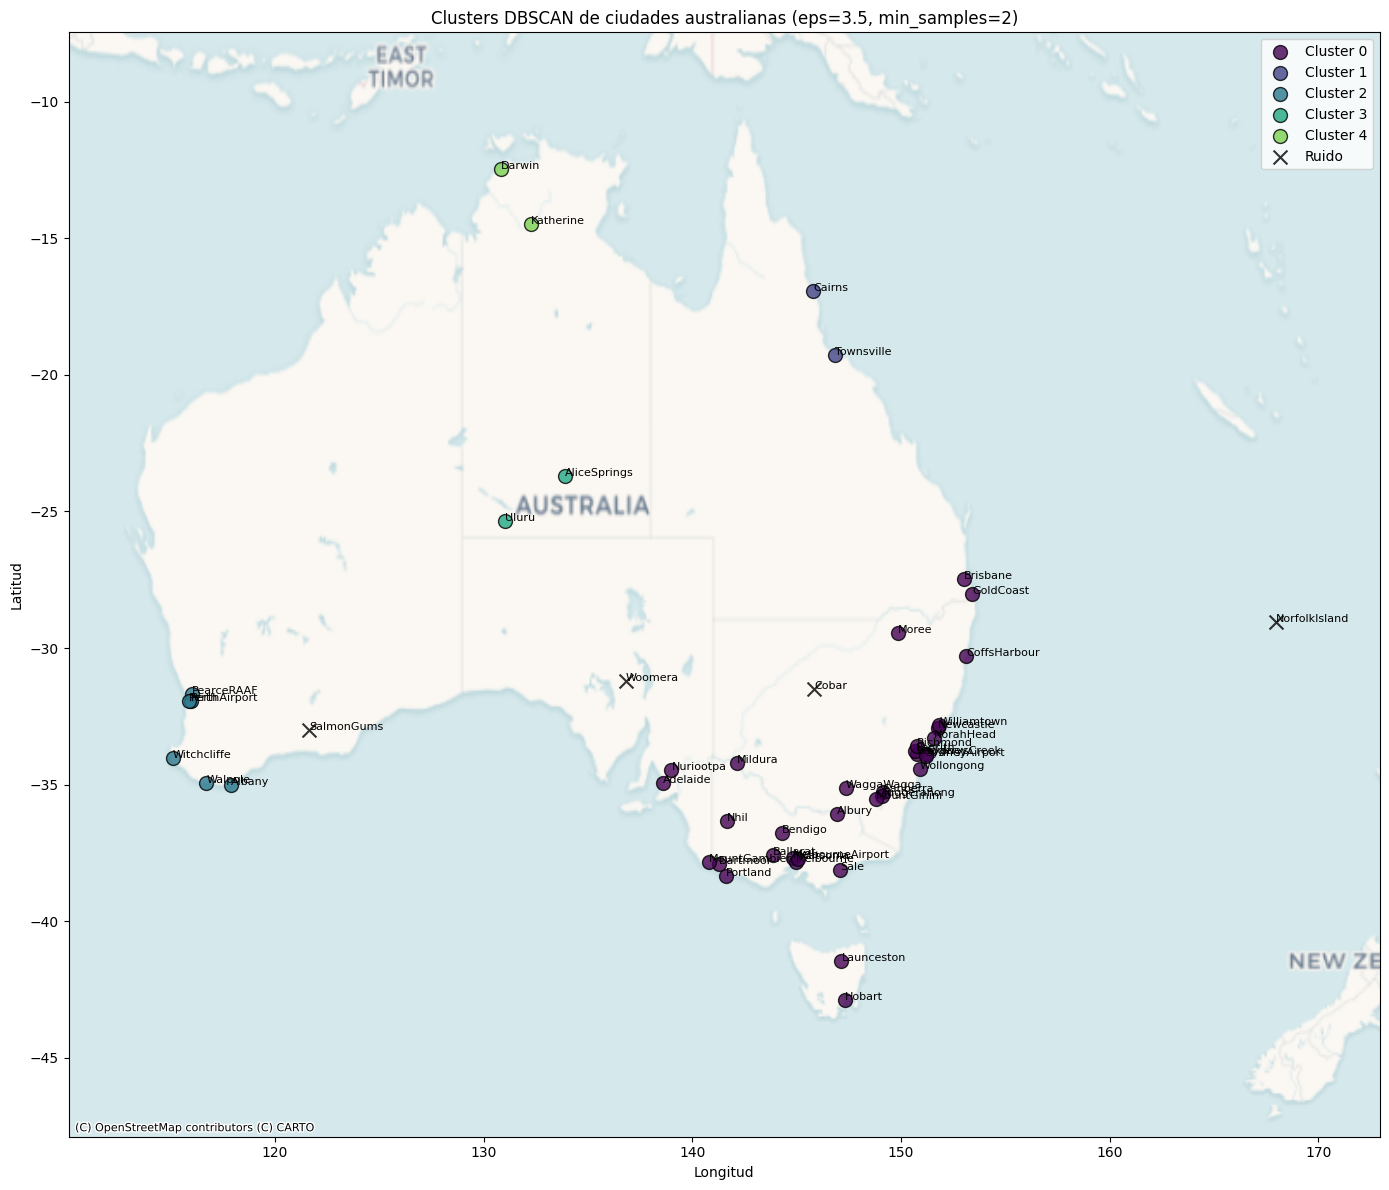


Ciudades en cada cluster:
Ruido (sin cluster): Cobar, NorfolkIsland, Woomera, SalmonGums
Cluster 0: Albury, BadgerysCreek, CoffsHarbour, Moree, Newcastle, NorahHead, Penrith, Richmond, Sydney, SydneyAirport, WaggaWagga, Williamtown, Wollongong, Canberra, Tuggeranong, MountGinini, Ballarat, Bendigo, Sale, MelbourneAirport, Melbourne, Mildura, Nhil, Portland, Watsonia, Dartmoor, Brisbane, GoldCoast, Adelaide, MountGambier, Nuriootpa, Hobart, Launceston
Cluster 1: Cairns, Townsville
Cluster 2: Albany, Witchcliffe, PearceRAAF, PerthAirport, Perth, Walpole
Cluster 3: AliceSprings, Uluru
Cluster 4: Darwin, Katherine


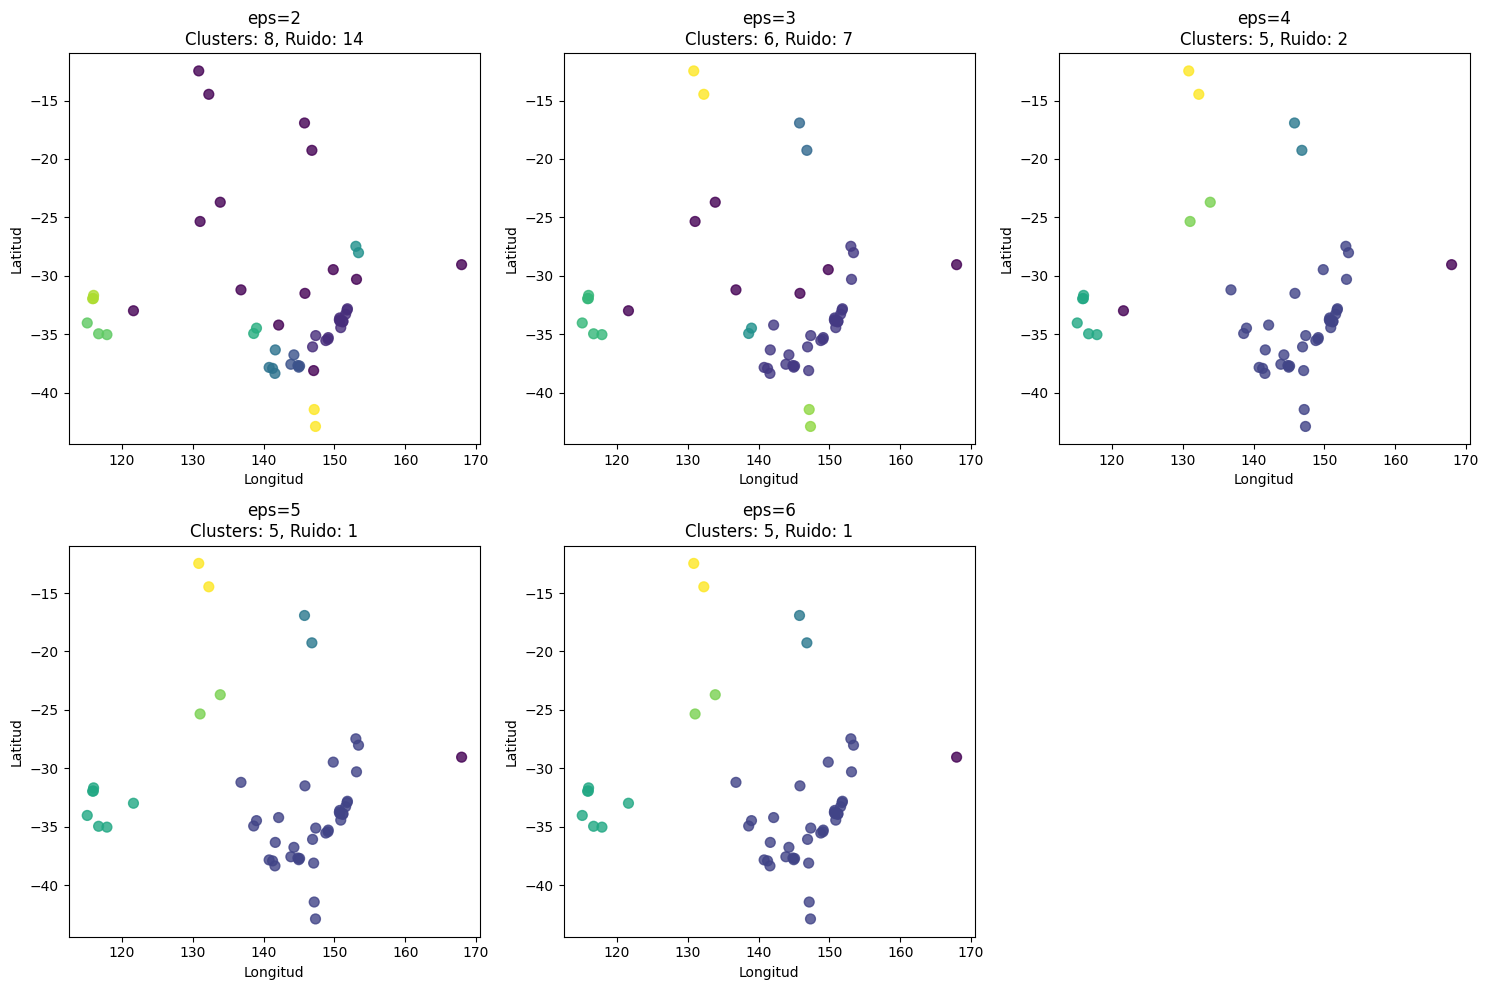


Comparación K-means vs DBSCAN:
              Ciudad  Cluster  Cluster_DBSCAN              Nombre_Región  \
2              Cobar        6              -1   Australia Occidental Sur   
41        SalmonGums        1              -1       Australia Occidental   
35           Woomera        8              -1                   Tasmania   
7      NorfolkIsland        4              -1                   Victoria   
0             Albury        0               0         Queensland Central   
22         Melbourne        0               0         Queensland Central   
23           Mildura        0               0         Queensland Central   
25          Portland        0               0         Queensland Central   
26          Watsonia        0               0         Queensland Central   
27          Dartmoor        0               0         Queensland Central   
28          Brisbane        2               0           Territorio Norte   
32          Adelaide        8               0           

In [44]:
# Usando las coordenadas que ya tienes
X = coords_df[['Latitud', 'Longitud']].values

# Parámetros para DBSCAN
# eps: radio de búsqueda (ajusta según la dispersión geográfica)
# min_samples: mínimo de puntos para formar un cluster
eps = 3.5  # Puedes ajustar este valor
min_samples = 2

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
coords_df['Cluster_DBSCAN'] = dbscan.fit_predict(X)

# Contar clusters (excluyendo ruido que es -1)
n_clusters_dbscan = len(set(coords_df['Cluster_DBSCAN'])) - (1 if -1 in coords_df['Cluster_DBSCAN'] else 0)
n_noise = list(coords_df['Cluster_DBSCAN']).count(-1)

print(f'Número de clusters encontrados: {n_clusters_dbscan}')
print(f'Número de puntos de ruido: {n_noise}')

# Visualización
plt.figure(figsize=(14, 12))
ax = plt.gca()

# Colorear según cluster (ruido en negro)
unique_labels = set(coords_df['Cluster_DBSCAN'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruido en negro
        col = 'k'
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (coords_df['Cluster_DBSCAN'] == k)
    xy = coords_df[class_member_mask][['Longitud', 'Latitud']]
    
    ax.scatter(xy['Longitud'], xy['Latitud'], c=[col], marker=marker, 
              s=100, alpha=0.8, edgecolor='k', label=f'Cluster {k}' if k != -1 else 'Ruido')

# Etiquetas de ciudades
for i, row in coords_df.iterrows():
    ax.text(row['Longitud'], row['Latitud'], row['Ciudad'], fontsize=8)

# Mapa base
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Voyager)

# Límites
min_lon = coords_df['Longitud'].min() - 5
max_lon = coords_df['Longitud'].max() + 5
min_lat = coords_df['Latitud'].min() - 5
max_lat = coords_df['Latitud'].max() + 5
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

plt.legend()
plt.title(f'Clusters DBSCAN de ciudades australianas (eps={eps}, min_samples={min_samples})')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()

# Ver las ciudades en cada cluster
print("\nCiudades en cada cluster:")
for cluster in sorted(coords_df['Cluster_DBSCAN'].unique()):
    ciudades_cluster = coords_df[coords_df['Cluster_DBSCAN'] == cluster]['Ciudad'].tolist()
    if cluster == -1:
        print(f"Ruido (sin cluster): {', '.join(ciudades_cluster)}")
    else:
        print(f"Cluster {cluster}: {', '.join(ciudades_cluster)}")

# Experimentar con diferentes valores de eps
eps_values = [2, 3, 4, 5, 6]
plt.figure(figsize=(15, 10))

for i, eps_val in enumerate(eps_values):
    dbscan_temp = DBSCAN(eps=eps_val, min_samples=2)
    labels = dbscan_temp.fit_predict(X)
    
    plt.subplot(2, 3, i+1)
    plt.scatter(coords_df['Longitud'], coords_df['Latitud'], 
               c=labels, cmap='viridis', s=50, alpha=0.8)
    
    n_clusters_temp = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_temp = list(labels).count(-1)
    
    plt.title(f'eps={eps_val}\nClusters: {n_clusters_temp}, Ruido: {n_noise_temp}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')

plt.tight_layout()
plt.show()

# Asignar nombres a las regiones basándose en los clusters encontrados
# (ajusta según los resultados que obtengas)
nombres_regiones_dbscan = {}
for i in range(n_clusters_dbscan):
    nombres_regiones_dbscan[i] = f'Región {i}'
nombres_regiones_dbscan[-1] = 'Sin Región'  # Para puntos de ruido

coords_df['Region_DBSCAN'] = coords_df['Cluster_DBSCAN'].map(nombres_regiones_dbscan)

# Crear el mapeo final para el dataframe original
mapeo_ciudad_region_dbscan = dict(zip(coords_df['Ciudad'], coords_df['Region_DBSCAN']))
df_ciudades['Region_DBSCAN'] = df_ciudades['Location'].map(mapeo_ciudad_region_dbscan)

# Comparar resultados
print("\nComparación K-means vs DBSCAN:")
comparacion = coords_df[['Ciudad', 'Cluster', 'Cluster_DBSCAN', 'Nombre_Región', 'Region_DBSCAN']]
print(comparacion.sort_values('Cluster_DBSCAN'))